In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv('C:/Users/92314/Desktop/Untitled Folder/Codsoft/Customer Churn Price Detection/Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
import seaborn as sns

# Count the number of customers who churned (Exited = 1) and those who didn't (Exited = 0)
churn_counts = data['Exited'].value_counts()

# Calculate the percentage of customers who churned
churn_percentage = (churn_counts[1] / data.shape[0]) * 100    #(churns/total_rows)*100



In [8]:
churn_counts

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
churn_percentage

20.369999999999997

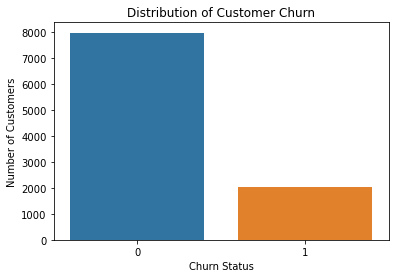

Percentage of customers who churned: 20.37%


In [10]:
# Plot the distribution of 'Exited' Costumers
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

# percentage of customers who churned
print(f"Percentage of customers who churned: {churn_percentage:.2f}%")


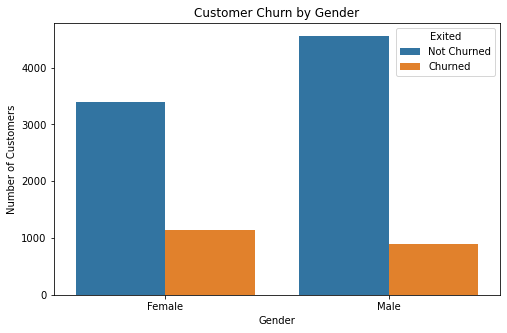

In [11]:
# 'Exited' vs 'Gender'
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Exited', data=data)
plt.title('Customer Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['Not Churned', 'Churned'])
plt.show()

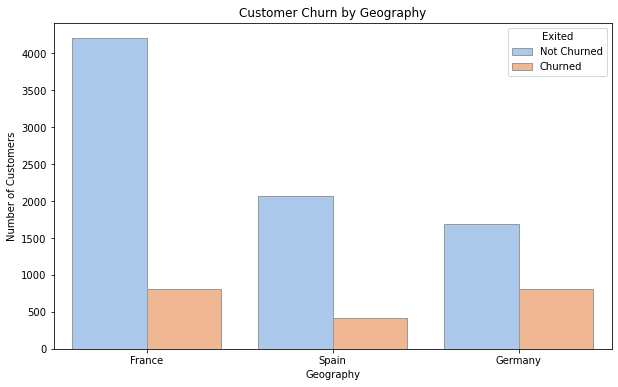

In [12]:
# 'Exited' vs 'Geography'
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Exited', palette='pastel', edgecolor=".6", data=data)
plt.title('Customer Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['Not Churned', 'Churned'])
plt.show()

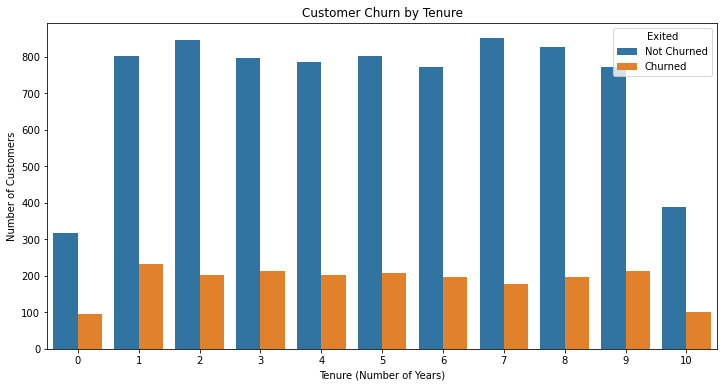

In [13]:
# 'Exited' vs 'Tenure'
plt.figure(figsize=(12, 6))
sns.countplot(x='Tenure', hue='Exited', data=data)
plt.title('Customer Churn by Tenure')
plt.xlabel('Tenure (Number of Years)')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['Not Churned', 'Churned'])
plt.show()

# Data Preprocessing

In [14]:
# removing unnecessary columns
data.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

In [15]:
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
print(data["Geography"].unique())
print(data["Gender"].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [17]:
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier


In [18]:
encoder = LabelEncoder()

In [19]:
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Geography'] = encoder.fit_transform(data['Geography'])

In [20]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
data['Gender'].unique() # (0=Female, 1=Male)

array([0, 1])

In [22]:
data['Geography'].unique() # [0 ='France' 2='Spain' 1='Germany']

array([0, 2, 1])

## Train, Test Split

In [24]:
X = data.drop('Exited', axis=1)
Y = data['Exited']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.25, random_state=42)

In [27]:
print("x_train Shape: " , x_train.shape)
print("y_train Shape: " , y_train.shape)

x_train Shape:  (7500, 10)
y_train Shape:  (7500,)


In [28]:
print("x_test Shape: " , x_test.shape)
print("y_test Shape: " , y_test.shape)

x_test Shape:  (2500, 10)
y_test Shape:  (2500,)


In [29]:
model = RandomForestClassifier()

In [30]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
model.score(x_test,y_test)

0.8652

In [32]:
predictions = model.predict(x_test)

In [33]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(y_true=y_test, y_pred=predictions)

array([[1941,   62],
       [ 275,  222]], dtype=int64)

In [50]:
cm = confusion_matrix(y_true=y_test, y_pred=predictions)

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        "without normalization"

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

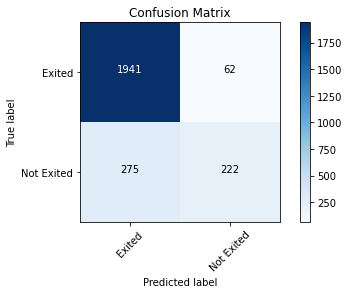

In [52]:
cm_plot_labels = ["Exited", "Not Exited"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')